# Times Higher Education University Rankings Times Series Analysis

## 1. Importing libraries

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Importing the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler # Importing StandardScaler for standardizing data

In [32]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [33]:
# Set path variable

path = r'C:\Users\HP\Documents\CareerFoundry\Data Immersion\Achievement 6\World University Rankings Analysis'

In [34]:
# Import dataset

df_times = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'times_top200.csv'))

## 2. Data Cleaning, Manipulations, and Preprocessing

##### Removing irrelevant columns

In [35]:
# Drop index column

df_times = df_times.drop(columns = ['Unnamed: 0'])

In [36]:
df_times

,world_rank_Times,university_name,country,teaching_score,international_outlook_score,research_score,citations_score,income_score,overall_score_Times,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,0.25,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,0.27,0.492537,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,0.33,0.587302,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,0.22,0.724138,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,NaN,94.2,7929.0,8.4,0.27,0.818182,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,196,Newcastle University,United Kingdom,30.9,84.3,27.5,81.5,34.7,49.2,20174.0,15.2,0.29,1.000000,2016
1197,196,"St George’s, University of London",United Kingdom,25.6,69.5,18.1,100.0,37.7,49.2,2958.0,13.4,0.17,1.564103,2016
1198,198,University of Trento,Italy,30.8,55.9,27.4,87.7,47.1,49.1,16841.0,43.2,0.08,1.040816,2016
1199,199,Paris Diderot University – Paris 7,France,30.5,64.9,22.9,91.0,29.0,48.9,27756.0,14.8,0.17,1.702703,2016


In [37]:
# Create a column and set the default value to 'January'

df_times['month'] = 'January'

df_times

,world_rank_Times,university_name,country,teaching_score,international_outlook_score,research_score,citations_score,income_score,overall_score_Times,num_students,student_staff_ratio,international_students,female_male_ratio,year,month
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,0.25,NaN,2011,January
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,0.27,0.492537,2011,January
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,0.33,0.587302,2011,January
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,0.22,0.724138,2011,January
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,NaN,94.2,7929.0,8.4,0.27,0.818182,2011,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,196,Newcastle University,United Kingdom,30.9,84.3,27.5,81.5,34.7,49.2,20174.0,15.2,0.29,1.000000,2016,January
1197,196,"St George’s, University of London",United Kingdom,25.6,69.5,18.1,100.0,37.7,49.2,2958.0,13.4,0.17,1.564103,2016,January
1198,198,University of Trento,Italy,30.8,55.9,27.4,87.7,47.1,49.1,16841.0,43.2,0.08,1.040816,2016,January
1199,199,Paris Diderot University – Paris 7,France,30.5,64.9,22.9,91.0,29.0,48.9,27756.0,14.8,0.17,1.702703,2016,January


In [38]:
# Duplicate each row 12 times
# Check if correct (original df was 1201 rows --> duplicating each row 12 times should lead to a df with 14412 rows)

newdf = pd.DataFrame(np.repeat(df_times.values, 12, axis=0))
newdf.columns = df_times.columns

newdf

,world_rank_Times,university_name,country,teaching_score,international_outlook_score,research_score,citations_score,income_score,overall_score_Times,num_students,student_staff_ratio,international_students,female_male_ratio,year,month
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,0.25,NaN,2011,January
1,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,0.25,NaN,2011,January
2,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,0.25,NaN,2011,January
3,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,0.25,NaN,2011,January
4,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,0.25,NaN,2011,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14407,200,Queen’s University Belfast,United Kingdom,34.1,93.4,33.3,68.9,35.7,48.8,17940.0,17.9,0.3,1.173913,2016,January
14408,200,Queen’s University Belfast,United Kingdom,34.1,93.4,33.3,68.9,35.7,48.8,17940.0,17.9,0.3,1.173913,2016,January
14409,200,Queen’s University Belfast,United Kingdom,34.1,93.4,33.3,68.9,35.7,48.8,17940.0,17.9,0.3,1.173913,2016,January
14410,200,Queen’s University Belfast,United Kingdom,34.1,93.4,33.3,68.9,35.7,48.8,17940.0,17.9,0.3,1.173913,2016,January


In [39]:
# Replace the 'month' value in every row aside from the original row to 'February'

newdf.loc[newdf.duplicated(keep = 'first'), 'month'] = 'February'

newdf

,world_rank_Times,university_name,country,teaching_score,international_outlook_score,research_score,citations_score,income_score,overall_score_Times,num_students,student_staff_ratio,international_students,female_male_ratio,year,month
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,0.25,NaN,2011,January
1,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,0.25,NaN,2011,February
2,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,0.25,NaN,2011,February
3,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,0.25,NaN,2011,February
4,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,0.25,NaN,2011,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14407,200,Queen’s University Belfast,United Kingdom,34.1,93.4,33.3,68.9,35.7,48.8,17940.0,17.9,0.3,1.173913,2016,February
14408,200,Queen’s University Belfast,United Kingdom,34.1,93.4,33.3,68.9,35.7,48.8,17940.0,17.9,0.3,1.173913,2016,February
14409,200,Queen’s University Belfast,United Kingdom,34.1,93.4,33.3,68.9,35.7,48.8,17940.0,17.9,0.3,1.173913,2016,February
14410,200,Queen’s University Belfast,United Kingdom,34.1,93.4,33.3,68.9,35.7,48.8,17940.0,17.9,0.3,1.173913,2016,February


In [40]:
newdf['month'].value_counts(dropna = False)

February    13211
January      1201
Name: month, dtype: int64

In [41]:
# Replace the months sequentially with March, April, May, etc. 

newdf.loc[newdf.duplicated(keep = 'first'), 'month'] = 'March'
newdf.loc[newdf.duplicated(keep = 'first'), 'month'] = 'April'
newdf.loc[newdf.duplicated(keep = 'first'), 'month'] = 'May'
newdf.loc[newdf.duplicated(keep = 'first'), 'month'] = 'June'
newdf.loc[newdf.duplicated(keep = 'first'), 'month'] = 'July'
newdf.loc[newdf.duplicated(keep = 'first'), 'month'] = 'August'
newdf.loc[newdf.duplicated(keep = 'first'), 'month'] = 'September'
newdf.loc[newdf.duplicated(keep = 'first'), 'month'] = 'October'
newdf.loc[newdf.duplicated(keep = 'first'), 'month'] = 'November'
newdf.loc[newdf.duplicated(keep = 'first'), 'month'] = 'December'

newdf

,world_rank_Times,university_name,country,teaching_score,international_outlook_score,research_score,citations_score,income_score,overall_score_Times,num_students,student_staff_ratio,international_students,female_male_ratio,year,month
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,0.25,NaN,2011,January
1,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,0.25,NaN,2011,February
2,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,0.25,NaN,2011,March
3,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,0.25,NaN,2011,April
4,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,0.25,NaN,2011,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14407,200,Queen’s University Belfast,United Kingdom,34.1,93.4,33.3,68.9,35.7,48.8,17940.0,17.9,0.3,1.173913,2016,August
14408,200,Queen’s University Belfast,United Kingdom,34.1,93.4,33.3,68.9,35.7,48.8,17940.0,17.9,0.3,1.173913,2016,September
14409,200,Queen’s University Belfast,United Kingdom,34.1,93.4,33.3,68.9,35.7,48.8,17940.0,17.9,0.3,1.173913,2016,October
14410,200,Queen’s University Belfast,United Kingdom,34.1,93.4,33.3,68.9,35.7,48.8,17940.0,17.9,0.3,1.173913,2016,November


In [42]:
#Check if each month has the original amount of rows

newdf['month'].value_counts(dropna = False)

January      1201
February     1201
March        1201
April        1201
May          1201
June         1201
July         1201
August       1201
September    1201
October      1201
November     1201
December     1201
Name: month, dtype: int64

In [43]:
# Create a subset with only relevant numerical columns, grouped by 'year' and 'country' columns first

newdf_sub1 = newdf.groupby(['year', 'month', 'country'], as_index=False)[['world_rank_Times', 
                                                                       'teaching_score',
                                                                       'international_outlook_score',
                                                                       'research_score',
                                                                       'citations_score',
                                                                       'income_score',
                                                                       'num_students',
                                                                       'student_staff_ratio',
                                                                       'international_students',
                                                                       'female_male_ratio']].mean()

In [44]:
newdf_sub1.head()

,year,month,country,world_rank_Times,teaching_score,international_outlook_score,research_score,citations_score,income_score,num_students,student_staff_ratio,international_students,female_male_ratio
0,2011,April,Australia,90.571429,49.657143,84.428571,53.342857,71.400000,58.183333,34468.571429,27.471429,0.314286,1.120199
1,2011,April,Austria,191.000000,42.750000,81.350000,40.250000,52.900000,31.000000,26430.000000,18.700000,0.320000,1.602108
2,2011,April,Belgium,121.500000,55.250000,27.150000,61.000000,49.000000,97.400000,37334.500000,38.000000,0.135000,1.249747
3,2011,April,Canada,106.888889,52.422222,69.520000,60.711111,65.522222,38.100000,33927.444444,19.577778,0.193333,1.229909
4,2011,April,China,105.333333,60.300000,44.140000,49.783333,66.350000,63.600000,37133.833333,12.616667,0.081667,0.764543


In [45]:
newdf_sub1.shape

(1896, 13)

In [46]:
# Create a further subset that just includes the year, country, and world ranking columns

newdf_sub1 = newdf_sub1[['year', 'month', 'country', 'world_rank_Times']]

In [47]:
# Create a subset that only includes universities from the USA

newdf_sub1_USA = newdf_sub1.loc[newdf_sub1['country'] == 'United States of America']

newdf_sub1_USA

,year,month,country,world_rank_Times
25,2011,April,United States of America,71.847222
51,2011,August,United States of America,71.847222
77,2011,December,United States of America,71.847222
103,2011,February,United States of America,71.847222
129,2011,January,United States of America,71.847222
...,...,...,...,...
1783,2016,March,United States of America,79.793651
1811,2016,May,United States of America,79.793651
1839,2016,November,United States of America,79.793651
1867,2016,October,United States of America,79.793651


In [48]:
# Drop the 'country' column since it is unnecessary now

newdf_sub1_USA = newdf_sub1_USA.drop(columns = ['country'])

In [49]:
# Set the "year" column as the index

from datetime import date

newdf_sub1_USA['datetime'] = pd.to_datetime(newdf_sub1_USA['year'].astype(str)  + newdf_sub1_USA['month'], format='%Y%B') # Create a datetime column from "year.""
newdf_sub1_USA = newdf_sub1_USA.set_index('datetime') # Set the datetime as the index of the dataframe.
newdf_sub1_USA.drop(['year', 'month'], axis=1, inplace=True) # Drop the "month" and "year" column.
newdf_sub1_USA.head()

,world_rank_Times
datetime,
2011-04-01,71.847222
2011-08-01,71.847222
2011-12-01,71.847222
2011-02-01,71.847222
2011-01-01,71.847222


In [59]:
# Sort the datetime column numerically

newdf_sub1_USA = newdf_sub1_USA.sort_values('datetime')

In [60]:
newdf_sub1_USA

,world_rank_Times
datetime,
2011-01-01,71.847222
2011-02-01,71.847222
2011-03-01,71.847222
2011-04-01,71.847222
2011-05-01,71.847222
...,...
2016-08-01,79.793651
2016-09-01,79.793651
2016-10-01,79.793651


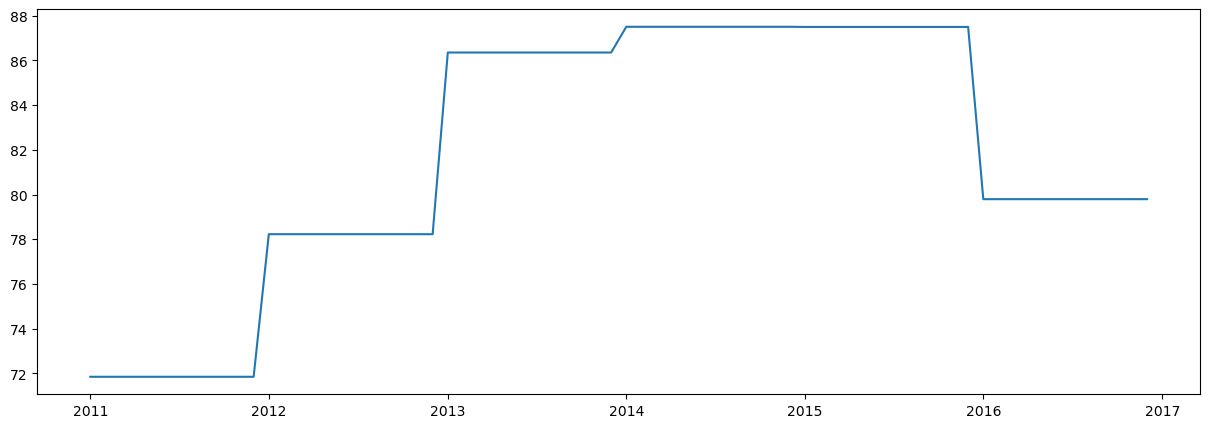

In [61]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(newdf_sub1_USA)

In [52]:
# Export the aggregate dataframe of world rankings since it could possibly be useful in the future

newdf.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'times_top200_monthsmanipulated.csv'))